In [80]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


In [81]:
df=pd.read_csv(r'C:\Users\lheft\Desktop\Fin Python\creditcard.csv')

In [82]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


V1-V29 are different variables with the names removed for privacy reasons.

In [83]:
print ("Fraud")
print (df.Time[df.Class == 1].describe())
print ()
print ("Normal")
print (df.Time[df.Class == 0].describe())

Fraud
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

Normal
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


In reference to the cell above, where class=1 that would indicate that this data record is fradulent where as a class record of 0 would indicate that the data record is legitamate.

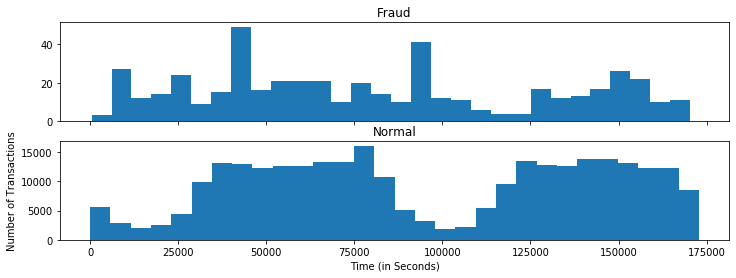

In [84]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

We can see that while although we have far more records for normal data vs fraud, the two sets of data share a similar uniform distribution.

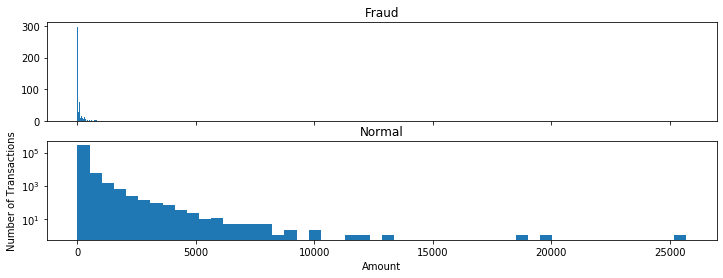

In [85]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

The two data sets share a similar distribution again.

In [86]:
anon_features = df.iloc[:,1:29].columns


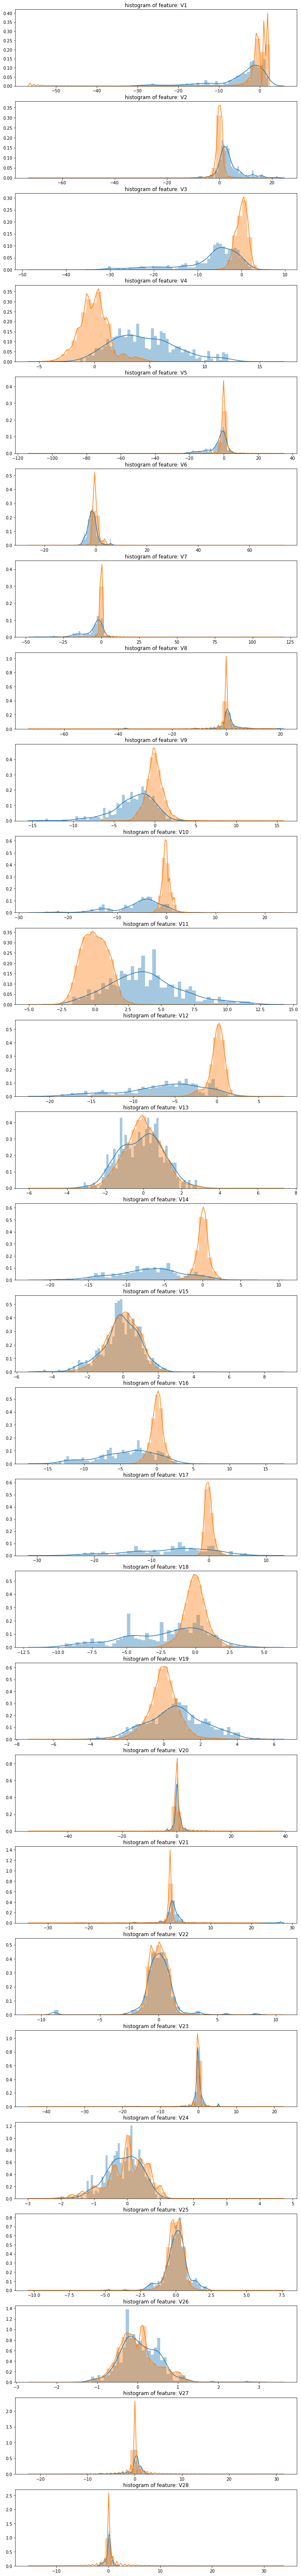

In [87]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[anon_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()


In this cell we compare the data for the 29 different variables for fraudlent data and legitamate data, similarly to how we did it before, except now we have added a mean line. We can see much more disparity in the distribution of some these variables.

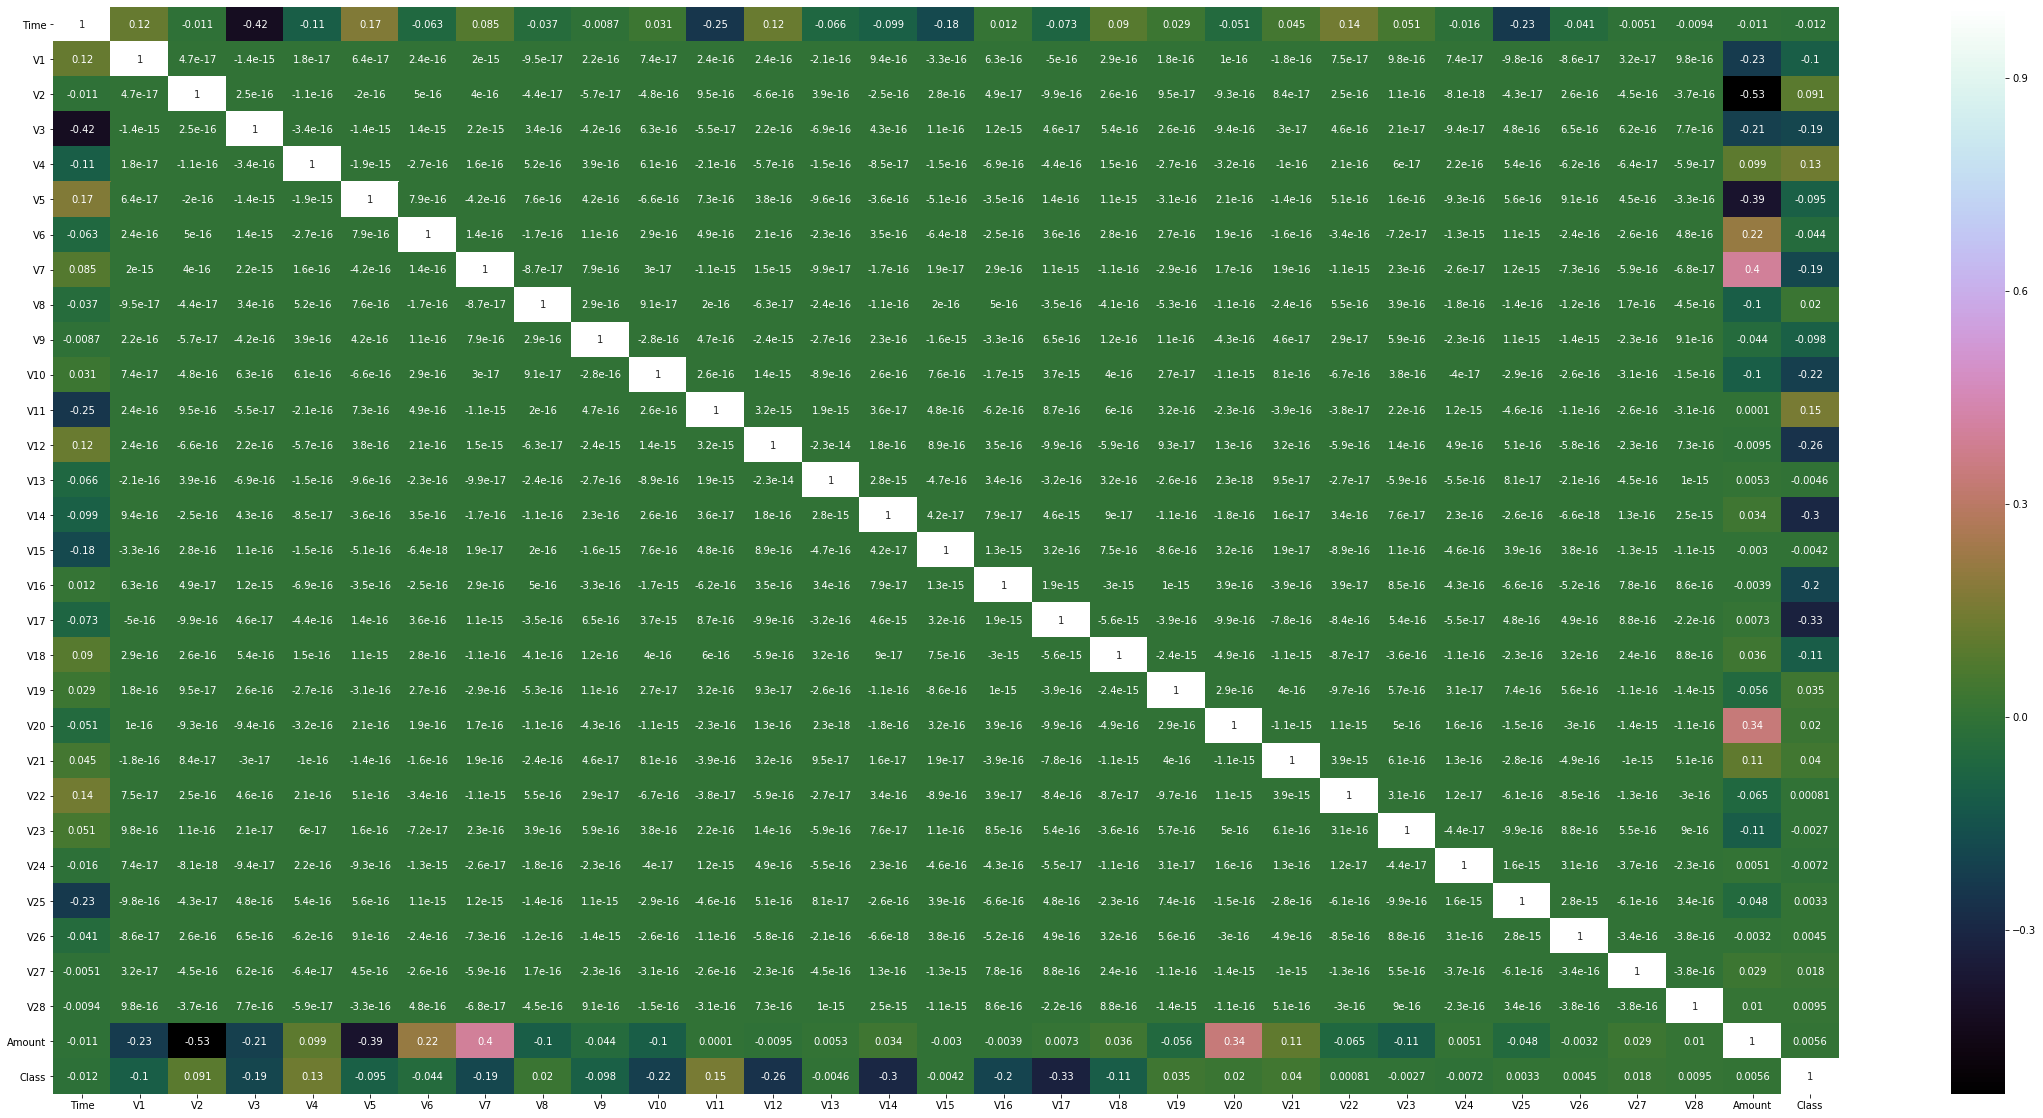

In [88]:
plt.figure(figsize = (40,20))
sns.heatmap(df.corr(), annot = True, cmap="cubehelix")
plt.show()

This heatmap shows the high collinearity with the target variable (Class)

In [76]:
estimators=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

X1 = df[estimators]
y = df['Class']

Here we define what we are going to use as estimators (variables that are used to predict) and which variable we are aiming to predict (Class).

In [50]:
col=X1.columns[:-1]
col

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [54]:
X = sm.add_constant(X1)
reg_logit = sm.Logit(y,X)
results_logit = reg_logit.fit()

C:\Users\lheft\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.003914
         Iterations 13


In [55]:
results_logit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               284807
Model:                          Logit   Df Residuals:                   284776
Method:                           MLE   Df Model:                           30
Date:                Mon, 26 Oct 2020   Pseudo R-squ.:                  0.6922
Time:                        18:58:46   Log-Likelihood:                -1114.8
converged:                       True   LL-Null:                       -3621.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.3917      0.249    -33.652      0.000      -8.880      -7.903
Time       -3.742e-06   2.26e-06     -1.659      0.097   -8.16e-06    6.79e-07
V1             0.0960      0.042      2.264      0.024       0.013       0.179
V2             0.0094      0.058      0.161      0.872      -0.104       0.123
V3            -0.0079      0.053     -0.149      0.881      -0.112       0.096
V4             0.6986      0.074      9.454      0.000       0.554       0.843
V5             0.1295      0.067      1.944      0.052      -0.001       0.260
V6            -0.1198      0.074     -1.626      0.104      -0.264       0.025
V7            -0.0969      0.067     -1.453      0.146      -0.228       0.034
V8            -0.1739      0.030     -5.711      0.000      -0.234      -0.114
V9            -0.2843      0.111     -2.561      0.010      -0.502      -0.067
V10           -0.8176      0.097     -8.432      0.000      -1.008      -0.628
V11           -0.0621      0.081     -0.762      0.446      -0.222       0.098
V12            0.0909      0.087      1.045      0.296      -0.080       0.261
V13           -0.3312      0.082     -4.058      0.000      -0.491      -0.171
V14           -0.5571      0.062     -8.949      0.000      -0.679      -0.435
V15           -0.1141      0.086     -1.330      0.183      -0.282       0.054
V16           -0.1908      0.125     -1.526      0.127      -0.436       0.054
V17           -0.0216      0.070     -0.309      0.757      -0.159       0.116
V18           -0.0131      0.129     -0.102      0.919      -0.266       0.240
V19            0.0963      0.097      0.993      0.321      -0.094       0.286
V20           -0.4582      0.082     -5.607      0.000      -0.618      -0.298
V21            0.3898      0.060      6.494      0.000       0.272       0.507
V22            0.6297      0.134      4.707      0.000       0.367       0.892
V23           -0.0951      0.058     -1.629      0.103      -0.209       0.019
V24            0.1289      0.147      0.874      0.382      -0.160       0.418
V25           -0.0761      0.131     -0.582      0.560      -0.332       0.180
V26            0.0195      0.190      0.103      0.918      -0.352       0.392
V27           -0.8188      0.122     -6.686      0.000      -1.059      -0.579
V28           -0.2937      0.088     -3.332      0.001      -0.467      -0.121
Amount         0.0009      0.000      2.449      0.014       0.000       0.002
==============================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Eleminatinates features with the highest P-value above alpha one at a time and returns the regression summary with all p-values below alpha

In [57]:
def back_feature_elem (data_frame,dep_var,col_list):
    

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(X,df.Class,col)

In [59]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               284807
Model:                          Logit   Df Residuals:                   284781
Method:                           MLE   Df Model:                           25
Date:                Mon, 26 Oct 2020   Pseudo R-squ.:                 0.06288
Time:                        19:00:05   Log-Likelihood:                -3393.5
converged:                       True   LL-Null:                       -3621.2
Covariance Type:            nonrobust   LLR p-value:                 1.285e-80
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Time          -0.0001   1.44e-06    -85.950      0.000      -0.000      -0.000
V1             0.8903      0.028     31.898      0.000       0.836       0.945
V2            -0.4553      0.023    -19.507      0.000      -0.501      -0.410
V3            -1.5984      0.032    -49.198      0.000      -1.662      -1.535
V4             0.1485      0.026      5.821      0.000       0.099       0.199
V5             0.4005      0.024     16.575      0.000       0.353       0.448
V6            -0.3897      0.025    -15.293      0.000      -0.440      -0.340
V7             0.0920      0.028      3.304      0.001       0.037       0.147
V8            -0.3891      0.023    -17.224      0.000      -0.433      -0.345
V9            -0.4635      0.043    -10.768      0.000      -0.548      -0.379
V10           -0.3852      0.051     -7.522      0.000      -0.486      -0.285
V11           -0.6200      0.034    -18.070      0.000      -0.687      -0.553
V12            0.1235      0.034      3.598      0.000       0.056       0.191
V13           -0.4500      0.034    -13.051      0.000      -0.518      -0.382
V14           -0.6917      0.032    -21.820      0.000      -0.754      -0.630
V15           -1.0432      0.041    -25.264      0.000      -1.124      -0.962
V16           -0.2463      0.042     -5.911      0.000      -0.328      -0.165
V17           -0.7211      0.034    -21.221      0.000      -0.788      -0.655
V18            0.0899      0.045      1.988      0.047       0.001       0.179
V20           -0.6817      0.050    -13.671      0.000      -0.779      -0.584
V21            0.5810      0.041     14.030      0.000       0.500       0.662
V22            1.3886      0.065     21.514      0.000       1.262       1.515
V23            0.2846      0.055      5.220      0.000       0.178       0.391
V25           -1.9852      0.073    -27.316      0.000      -2.128      -1.843
V26            0.3097      0.072      4.309      0.000       0.169       0.451
V27           -0.7571      0.089     -8.534      0.000      -0.931      -0.583
==============================================================================

Possibly complete quasi-separation: A fraction 0.68 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [64]:
new_features=df[['Time','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V20','V21', 'V22', 'V23', 'V25', 'V26', 'V27','Class']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)


logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)


C:\Users\lheft\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9989817773252344

In [65]:
accuracy_score(y_test,y_pred)

0.9989817773252344

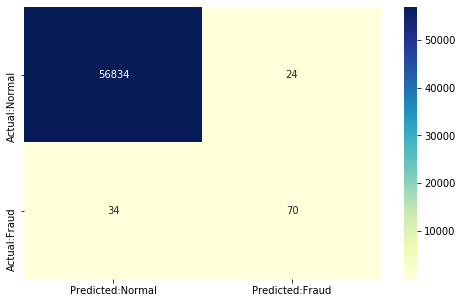

In [67]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:Normal','Predicted:Fraud'],index=['Actual:Normal','Actual:Fraud'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");